# **DATA PROJECT 2024: DO INTERENATIONAL WORKERS IN DENMARK REMEDY LABOR SHORTAGE?**

By Emma Knippel, Anna Abildsjov and Oscar Nyholm

# Table of contents
* [Setup](#toc0_)   

* [Read and clean data](#toc1_) 

* [Question 2: Market Clearing Error](#toc2_)    

* [Question 3: Market Clearing Price](#toc3_)    

* [Question 4: A as Price Setter](#toc4_)   

* [Question 5: A as Market Maker](#toc5_) 

* [Question 6: Utalitarian Social Planner](#toc6_) 

* [Question 7: Random Draw](#toc7_) 

* [Question 8: Market Equilibrium](#toc8_) 



## <a id='toc0_'></a>[Setup](#toc0_)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2
import json

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2


In [2]:
# installing API reader, that will allow to load data from DST.
%pip install git+https://github.com/alemartinello/dstapi
%pip install pandas-datareader

import pandas_datareader # install with `pip install pandas-datareader`
from dstapi import DstApi # install with `pip install git+https://github.com/alemartinello/dstapi`

  Cloning https://github.com/alemartinello/dstapi to /private/var/folders/24/czmv85dj1_3dcc2tc4x8kd0r0000gn/T/pip-req-build-3efu7ez2
  Running command git clone --quiet https://github.com/alemartinello/dstapi /private/var/folders/24/czmv85dj1_3dcc2tc4x8kd0r0000gn/T/pip-req-build-3efu7ez2
  Resolved https://github.com/alemartinello/dstapi to commit d9eeb5a82cbc70b7d63b2ff44d92632fd77123a4
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## <a id='toc1_'></a>[Read and clean data](#toc1_)

In [3]:
# importing the actual data from DST
employees = DstApi('LBESK03')
lb_short_service = DstApi('KBS2')
lb_short_manu = DstApi('BARO3')
lb_short_cons = DstApi('KBYG33')
with open('International Labor.json', 'r') as f:
    int_data = json.load(f)
int_lb = pd.DataFrame(int_data)

In [4]:
tabsum = employees.tablesummary(language = 'en')
display(tabsum)
for variable in tabsum['variable name']:
    print(variable+':')
    display(employees.variable_levels(variable, language='en'))

KeyboardInterrupt: 

In [23]:
tabsum2 = lb_short_service.tablesummary(language = 'en')
display(tabsum2)
for variable in tabsum2['variable name']:
    print(variable+':')
    display(lb_short_service.variable_levels(variable, language='en'))

Table KBS2: Production limitations in Services by industry (DB07), type and time
Last update: 2024-03-21T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,BRANCHE07,19,000,SERVICES TOTAL,090,Other service activities (94-95),False
1,TYPE,6,INGEN,No limitations,ANDÅS,Other factors,False
2,Tid,155,2011M05,2011M05,2024M03,2024M03,True


BRANCHE07:


,id,text
0,000,SERVICES TOTAL
1,005,TRANSPORT (49-53)
2,010,Land transport and others (49)
3,015,TOURISME (55-56; 79)
4,020,Hotels and similar accommodation (55)
5,025,Restaurants (56)
6,030,Travel agent activities (79)
7,035,COMMUNICATION AND INFORMATION (58; 61-63)
8,040,Information technology service activities (62)
9,045,"FINANCE, INSURANCE AND REAL ESTATE (64-65; 68)"


TYPE:


,id,text
0,INGEN,No limitations
1,MEFT,Insufficient demand
2,MAAK,Shortage of labour force
3,MALOK,Shortage of space and/or equipment
4,FINBR,Financial constraints
5,ANDÅS,Other factors


Tid:


,id,text
0,2011M05,2011M05
1,2011M06,2011M06
2,2011M07,2011M07
3,2011M08,2011M08
4,2011M09,2011M09
...,...,...
150,2023M11,2023M11
151,2023M12,2023M12
152,2024M01,2024M01
153,2024M02,2024M02


In [28]:
tabsum3 = lb_short_manu.tablesummary(language = 'en')
display(tabsum3)
for variable in tabsum3['variable name']:
    print(variable+':')
    display(lb_short_manu.variable_levels(variable, language='en'))

Table BARO3: Production limitations in industry by industry (DB07), type and time
Last update: 2024-01-24T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,BRANCHE07,20,BC,BC Mining and quarrying and manufacturing,S4,Non-durable consumer goods (MIG),False
1,TYPE,6,INGEN,No limitations,ANDÅS,Other factors,False
2,Tid,77,2005K1,2005Q1,2024K1,2024Q1,True


BRANCHE07:


,id,text
0,BC,BC Mining and quarrying and manufacturing
1,B,B Mining and quarrying
2,C,C Manufacturing
3,CA,"CA Manufacture of food products, beverages and..."
4,CB,CB Textiles and leather products
5,CC,CC Wood and paper products and printing
6,CD,CD Oil refinery etc.
7,CE,CE Manufacture of chemicals
8,CF,CF Pharmaceuticals
9,CG,"CG Manufacture of plastic, glass and concrete"


TYPE:


,id,text
0,INGEN,No limitations
1,AMA,Shortage of labour force
2,UKA,Shortage of material and/or equipment
3,UEF,Insufficient demand
4,FINBE,Financial constraints
5,ANDÅS,Other factors


Tid:


,id,text
0,2005K1,2005Q1
1,2005K2,2005Q2
2,2005K3,2005Q3
3,2005K4,2005Q4
4,2006K1,2006Q1
...,...,...
72,2023K1,2023Q1
73,2023K2,2023Q2
74,2023K3,2023Q3
75,2023K4,2023Q4


In [38]:
tabsum4 = lb_short_cons.tablesummary(language = 'en')
display(tabsum4)
for variable in tabsum4['variable name']:
    print(variable+':')
    display(lb_short_cons.variable_levels(variable, language='en'))

Table KBYG33: Production limitations in Construction by industry (DB07), type and time
Last update: 2024-03-21T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,BRANCHE07,9,F,F Construction,43003,43003 Other specialized construction activitie...,False
1,TYPE,7,INGEN,No limitations,ANDÅS,Other factors,False
2,Tid,231,2005M01,2005M01,2024M03,2024M03,True


BRANCHE07:


,id,text
0,F,F Construction
1,41000,41000 Construction of buildings
2,42000,42000 Civil engineering
3,43201,43201 Electrical installation etc.
4,432200,"432200 Plumbing, heat and air-conditioning ins..."
5,43301,43301 Joinery installation etc.
6,43302,43302 Painting and Glazing etc.
7,439910,439910 Bricklayers
8,43003,43003 Other specialized construction activitie...


TYPE:


,id,text
0,INGEN,No limitations
1,MEFT,Insufficient demand
2,DVEJR,Bad weather
3,MAT,Shortage of material and/or equipment
4,AMA,Shortage of labour force
5,FB,Financial contraints
6,ANDÅS,Other factors


Tid:


,id,text
0,2005M01,2005M01
1,2005M02,2005M02
2,2005M03,2005M03
3,2005M04,2005M04
4,2005M05,2005M05
...,...,...
226,2023M11,2023M11
227,2023M12,2023M12
228,2024M01,2024M01
229,2024M02,2024M02


In [21]:
params = employees._define_base_params(language='en')

params = {'table': 'LBESK03',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'BRANCHEDB071038', 'values': ['TOT']},
  {'code': 'Tid', 'values': ['>2013M12<=2024M01']}]}

empl = employees.get_data(params=params)

,BRANCHEDB071038,TID,INDHOLD
0,"TOT Industry, total",2014M01,2561675
1,"TOT Industry, total",2014M02,2563945
2,"TOT Industry, total",2014M03,2566733
3,"TOT Industry, total",2014M04,2569268
4,"TOT Industry, total",2014M05,2570962
...,...,...,...
116,"TOT Industry, total",2023M09,3000695
117,"TOT Industry, total",2023M10,3001427
118,"TOT Industry, total",2023M11,3004958
119,"TOT Industry, total",2023M12,3005286


In [37]:
params2 = lb_short_service._define_base_params(language='en')

params2 = {'table': 'KBS2',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'BRANCHE07', 'values': ['*']},
  {'code': 'TYPE', 'values': ['MAAK']},
  {'code': 'Tid', 'values': ['>2013M12<=2024M01']}]}

lab_short_service = lb_short_service.get_data(params=params2)
lab_short_service.sort_values(by = ['TID', 'BRANCHE07'], inplace=True)
lab_short_service.head(50)

,BRANCHE07,TYPE,TID,INDHOLD
1436,"ARTS, RECREATION AND OTHER SERVICES (90-95)",Shortage of labour force,2014M01,6
1437,"Arts, sports and recreation activities (90-93)",Shortage of labour force,2014M01,1
1433,"CLEANING AND OTHER OPERATIONEL SERVICE (77-78,...",Shortage of labour force,2014M01,13
1427,"COMMUNICATION AND INFORMATION (58, 61-63)",Shortage of labour force,2014M01,9
1432,"CONSULTANCY, RESEARCH AND OTHERS (69-74)",Shortage of labour force,2014M01,19
1429,"FINANCE, INSURANCE AND REAL ESTATE (64-65, 68)",Shortage of labour force,2014M01,0
1430,Financial and insurance activities (64-65),Shortage of labour force,2014M01,0
1424,Hotels and similar accommodation (55),Shortage of labour force,2014M01,1
1428,Information technology service activities (62),Shortage of labour force,2014M01,15
1422,Land transport and others (49),Shortage of labour force,2014M01,3


In [40]:
params3 = lb_short_manu._define_base_params(language='en')

params3 = {'table': 'BARO3',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'BRANCHE07', 'values': ['C']},
  {'code': 'TYPE', 'values': ['AMA']},
  {'code': 'Tid', 'values': ['>2013K4<=2024K1']}]}

lab_short_manu = lb_short_manu.get_data(params=params3)
lab_short_manu.sort_values(by = ['TID'], inplace=True)
lab_short_manu.head(50)

KeyboardInterrupt: 

In [41]:
params4 = lb_short_cons._define_base_params(language='en')

params4 = {'table': 'KBYG33',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'BRANCHE07', 'values': ['F']},
  {'code': 'TYPE', 'values': ['AMA']},
  {'code': 'Tid', 'values': ['>2013M12<=2024M01']}]}

lab_short_cons = lb_short_cons.get_data(params=params3)
lab_short_cons.sort_values(by = ['TID'], inplace=True)
lab_short_cons.head(50)

KeyboardInterrupt: 

## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Interactive plot** :

In [6]:
def plot_func():
    # Function that operates on data set
    pass

widgets.interact(plot_func, 
    # Let the widget interact with data through plot_func()    
); 


interactive(children=(Output(),), _dom_classes=('widget-interact',))

Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

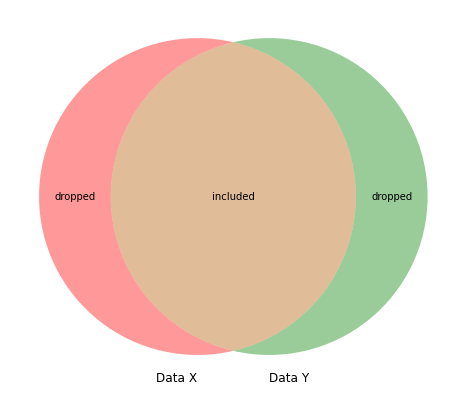

In [3]:
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('Data X', 'Data Y'))
v.get_label_by_id('100').set_text('dropped')
v.get_label_by_id('010').set_text('dropped' )
v.get_label_by_id('110').set_text('included')
plt.show()

Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.